In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Read the data
data0 = pd.read_csv('sample1.csv')

data = data0.drop(['name'], axis=1)
data.head()


,id,grade,organisation,school,seed
0,1,A,T,A,0
1,2,B,O,A,0
2,3,C,K,N,1
3,4,A,N,N,0
4,5,B,T,N,1


In [16]:
data

,id,grade,organisation,school,seed
0,1,A,T,A,0
1,2,B,O,A,0
2,3,C,K,N,1
3,4,A,N,N,0
4,5,B,T,N,1
5,6,C,O,J,0
6,7,A,K,J,1
7,8,B,N,A,0
8,9,C,T,A,0
9,10,A,O,J,0


In [17]:
from sklearn.preprocessing import LabelEncoder
label_data = data.copy()
label_encoder = LabelEncoder()
for col in data.columns:
    label_data[col] = label_encoder.fit_transform(data[col])
label_data

,id,grade,organisation,school,seed
0,0,0,3,0,0
1,1,1,2,0,0
2,2,2,0,2,1
3,3,0,1,2,0
4,4,1,3,2,1
5,5,2,2,1,0
6,6,0,0,1,1
7,7,1,1,0,0
8,8,2,3,0,0
9,9,0,2,1,0


<AxesSubplot:xlabel='grade', ylabel='Count'>

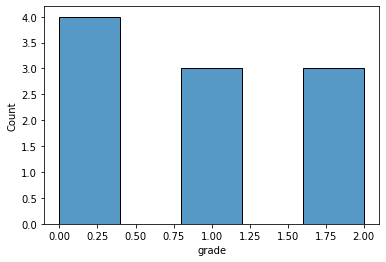

In [18]:
import seaborn as sns
sns.histplot(label_data["grade"])

In [29]:
df = label_data.copy()
df

,id,grade,organisation,school,seed
0,0,0,3,0,0
1,1,1,2,0,0
2,2,2,0,2,1
3,3,0,1,2,0
4,4,1,3,2,1
5,5,2,2,1,0
6,6,0,0,1,1
7,7,1,1,0,0
8,8,2,3,0,0
9,9,0,2,1,0


In [35]:
df2 = df.copy()

for col in ["seed", "grade"]:
    df2.sort_values(by=[col], inplace=True)
df2

,id,grade,organisation,school,seed
0,0,0,3,0,0
3,3,0,1,2,0
9,9,0,2,1,0
6,6,0,0,1,1
1,1,1,2,0,0
7,7,1,1,0,0
4,4,1,3,2,1
5,5,2,2,1,0
8,8,2,3,0,0
2,2,2,0,2,1


In [33]:
df2 = df.copy()
df2.sort_values(by=["seed"], inplace=True)


In [43]:
df2 = df.copy()
df_seeds = dict(tuple(df2.groupby('seed')))
df_seeds

{0:    id  grade  organisation  school  seed
 0   0      0             3       0     0
 1   1      1             2       0     0
 3   3      0             1       2     0
 5   5      2             2       1     0
 7   7      1             1       0     0
 8   8      2             3       0     0
 9   9      0             2       1     0,
 1:    id  grade  organisation  school  seed
 2   2      2             0       2     1
 4   4      1             3       2     1
 6   6      0             0       1     1}

In [46]:
df_grade = dict()
for i in df_seeds:
    df_grade[i] = dict(tuple(df_seeds[i].groupby('grade')))
df_grade

{0: {0:    id  grade  organisation  school  seed
  0   0      0             3       0     0
  3   3      0             1       2     0
  9   9      0             2       1     0,
  1:    id  grade  organisation  school  seed
  1   1      1             2       0     0
  7   7      1             1       0     0,
  2:    id  grade  organisation  school  seed
  5   5      2             2       1     0
  8   8      2             3       0     0},
 1: {0:    id  grade  organisation  school  seed
  6   6      0             0       1     1,
  1:    id  grade  organisation  school  seed
  4   4      1             3       2     1,
  2:    id  grade  organisation  school  seed
  2   2      2             0       2     1}}

In [47]:
df_grade[0][0]

,id,grade,organisation,school,seed
0,0,0,3,0,0
3,3,0,1,2,0
9,9,0,2,1,0


In [55]:
df_grade[0][0].id.tolist()


[0, 3, 9]

In [116]:
n = 5

entered = 0
groups = dict((k+1, []) for k in range(n))

for i in df_grade:
    for j in df_grade[i]:
        for k in df_grade[i][j].id.tolist():
#             entered += 1
            groups[entered%n+1].append(k)
#             groups["0"].append(i)
            entered += 1
# groups[0]=[]
groups

{1: [0, 5], 2: [3, 8], 3: [9, 6], 4: [1, 4], 5: [7, 2]}

In [117]:
data0

,id,name,grade,organisation,school,seed
0,1,a,A,T,A,0
1,2,b,B,O,A,0
2,3,c,C,K,N,1
3,4,d,A,N,N,0
4,5,e,B,T,N,1
5,6,f,C,O,J,0
6,7,g,A,K,J,1
7,8,h,B,N,A,0
8,9,i,C,T,A,0
9,10,j,A,O,J,0


In [118]:
idx = groups[1][1]

In [119]:
data0.loc[idx]["name"]


'f'

In [122]:
for i in groups:
    print(f'Group: {i}')
    for j in range(len(groups[i])):
          idx = groups[i][j]
          print(f'\t\t{data0.loc[idx]["name"]}\t{data0.loc[idx]["seed"]}\t{data0.loc[idx]["grade"]}')

Group: 1
		a	0	A
		f	0	C
Group: 2
		d	0	A
		i	0	C
Group: 3
		j	0	A
		g	1	A
Group: 4
		b	0	B
		e	1	B
Group: 5
		h	0	B
		c	1	C
